# Домашнее задание по теме "Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить".

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# т. к. выборки независимые и имеют нормальное распределение, то применяем t-тест 
stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=-1.7338006472109972, pvalue=0.08511123469659897)

Если принять уровень значимости 𝛼 за 5%, то p-value = 0.085 > 𝛼, а значит, нет весомых оснований предполагать, что имеются различия в эффекте препаратов (нулевая гипотеза об отсутствии эффекта не отвергается).

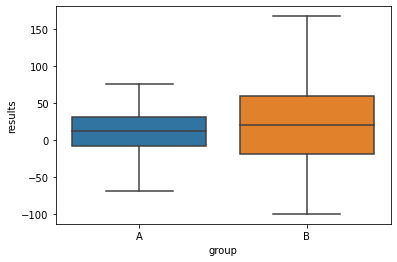

In [3]:
plot_data = pd.DataFrame()
plot_data['group'] = ['A']*100+['B']*100
plot_data['results'] = np.concatenate((A, B))
sns.boxplot(x='group', y='results', data=plot_data);

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [4]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# переменные зависимы и имеют нормальное распределение. Используем парный t-test
stats.ttest_rel(A, B)

Ttest_relResult(statistic=-2.1701703735210716, pvalue=0.03238579156467659)

Если 𝛼 = 0.05, то p < 𝛼, значит, у нас есть основания отвергнуть нулевую гипотезу об отсутствии эффекта препарата.

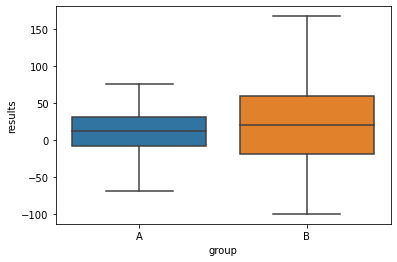

In [5]:
plot_data = pd.DataFrame()
plot_data['group'] = ['A']*100+['B']*100
plot_data['results'] = np.concatenate((A, B))
sns.boxplot(x='group', y='results', data=plot_data);

**На самом деле, поскольку в обоих случаях p-value близко к 𝛼 = 0.05, то делать выводы о наличии или отсутствии эффекта сложно. Следует выбрать другой уровень значимости, чтобы делать какие-то значимые выводы.**

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [6]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# т. к. выборки у нас 3, то используем дисперсионный анализ Фишера
fvalue, pvalue = stats.f_oneway(water, nutri, mineral)
fvalue, pvalue

(12.525963044834192, 2.9240047906326866e-05)

Получено очень маленькое значение p-value << 0.05, а значит, у нас имеются отличия как минимум в двух выборках. 

In [7]:
# проведём t-тест для выборок с удобрением и минералкой
stats.ttest_ind(nutri, mineral, equal_var=False)

Ttest_indResult(statistic=4.257784009579261, pvalue=0.00012619663665755575)

Опять же получаем очень маленькое p-value, значит, есть разница в применении удобрении и минералки. 

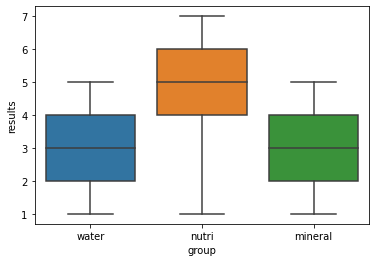

In [8]:
plot_data = pd.DataFrame()
plot_data['group'] = ['water']*len(water)+['nutri']*len(nutri)+['mineral']*len(mineral)
plot_data['results'] = water + nutri + mineral
sns.boxplot(x='group', y='results', data=plot_data);

Наглядно виден положительный эффект от применения удобрения при поливе. 

# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [9]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [10]:
# Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


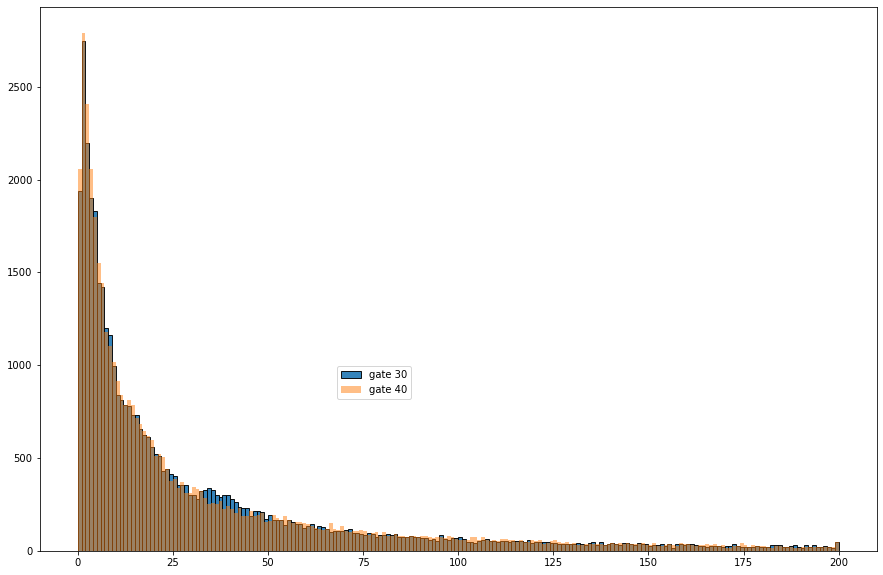

In [11]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=0.9, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.5, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

Визуально отличий между выборками нет - влияние установленной версии на количество сыгранных раундов либо отсутствует, либо очень мало.

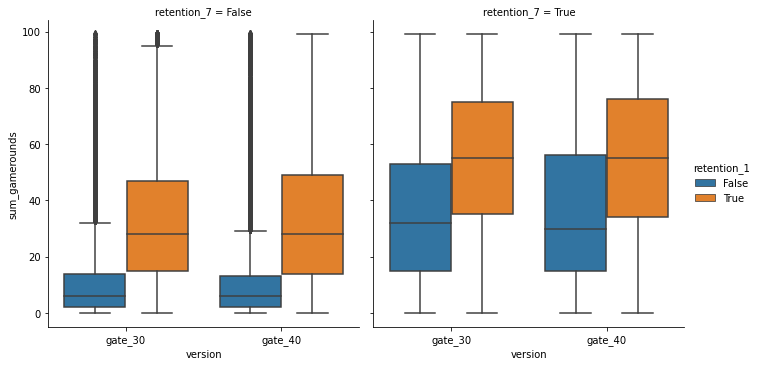

In [28]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);

То же самое - по графику нельзя сделать явных выводов о влиянии версии игры на 1-дневное или 7-дневное возращение.
Более информативным будет исследование среднего значения 1-дневного и 7-дневного возвращения.

<Figure size 1080x720 with 0 Axes>

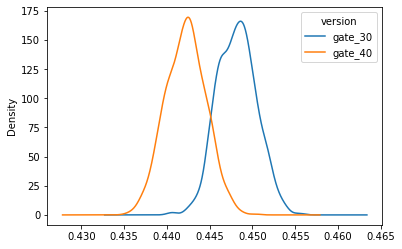

In [86]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density');

По графику видно, что средний процент игроков, который возвращался в игру после 1 дня, слегка уменьшился после того, как ворота передвинули на 40-й уровень.

<Figure size 1080x720 with 0 Axes>

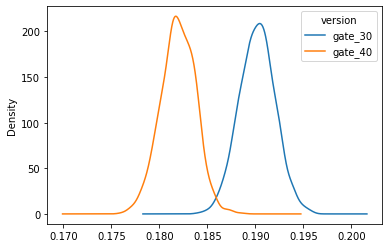

In [88]:
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density');

То же самое - небольшое уменьшение процента игроков, вернувшихся в игру после 7 дня после установки.

Выполним точный тест Фишера для выявления взаимосвязи между игроками, игравшими на 30-й или 40-й версии и вернувшихся в игру после 1-ого или 7-ого дня.

In [87]:
import scipy.stats as stats

ret_30 = [len(data.loc[(data.version=='gate_30') & (data.retention_1==True)]), 
         len(data.loc[(data.version=='gate_30') & (data.retention_1==False)])]
ret_40 = [len(data.loc[(data.version=='gate_40') & (data.retention_1==True)]), 
         len(data.loc[(data.version=='gate_40') & (data.retention_1==False)])]

oddsratio, pvalue = stats.fisher_exact([ret_30, ret_40]) 
pvalue

0.07470723372529989

Поскольку полученное p-value близко к уровню значимости 5%, то нельзя судить о наличии или отсутствии ярко выраженного эффекта. Формально говоря, т. к. p-value > 𝛼, то мы не отвергаем нулевую гипотезу о том, что эффекта от сдвига ворот нет. Однако на графиках видно небольшое уменьшение процента игроков, вернувшихся в игру после 1-ого и 7-ого дня (порядка 1%). Является ли это изменение значимым - вопрос сложный. Если да - то ворота лучше оставить на 30-м уровне. 

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [15]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
# Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
# что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [16]:
sample_A = pokemon.loc[(pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')].Attack
sample_B = pokemon.loc[(pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')].Attack
t, p = stats.ttest_ind(sample_A, sample_B, equal_var=False) 
t, p

(-3.404097725015682, 0.0011269727532387764)

Т. к. p-value = 0.001 < 𝛼 = 0.05, то у нас действительно есть различия в выборках. Продемонстрируем графически:

73.21428571428571 94.38095238095238


<AxesSubplot:xlabel='Class', ylabel='Attack'>

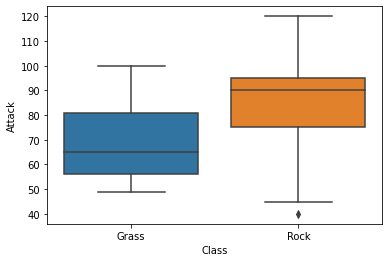

In [17]:
plot_data = pd.DataFrame()
plot_data['Class'] = ['Grass']*len(sample_A)+['Rock']*len(sample_B)
plot_data['Attack'] = pd.concat([sample_A, sample_B])
print(sample_A.mean(), sample_B.mean())
sns.boxplot(x='Class', y='Attack', data=plot_data)

Таким образом, профессор оказался не прав - обычная атака сильнее у покемонов из класса Rock.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [18]:
sample_A = pokemon.loc[(pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')].Speed
sample_B = pokemon.loc[(pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')].Speed
t, p = stats.ttest_ind(sample_A, sample_B, equal_var=False) 
t, p

(-1.542980807203786, 0.12455301217748223)

В этом случае p-value > 𝛼 = 0.05, а значит, нет оснований полагать, что покемоны в одном классе быстрее покемонов в другом классе.

65.96428571428571 71.55670103092784


<AxesSubplot:xlabel='Class', ylabel='Speed'>

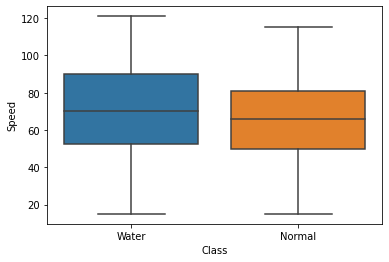

In [19]:
plot_data = pd.DataFrame()
plot_data['Class'] = ['Water']*len(sample_A)+['Normal']*len(sample_B)
plot_data['Speed'] = pd.concat([sample_A, sample_B])
print(sample_A.mean(), sample_B.mean())
sns.boxplot(x='Class', y='Speed', data=plot_data)

При графической проверке выяснилось, что средняя скорость покемонов в классе Water чуть больше, чем в классе Normal (66 против 71.5). Является значимым это различие или нет, судить профессору.